# Avaliação da influência de normalizações na acurácia de um modelo

In [1]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importação do dataset
from sklearn.datasets import fetch_california_housing

# bibliotecas para o modelo
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PolynomialFeatures

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
# Usando o dataset California Housing incluído no Scikitlearn
# este dataset não tem valores nulos, o que facilita o entendimento do exemplo
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# obtendo as features e o target (valores de venda)
X, y = fetch_california_housing(return_X_y=True)

In [4]:
print(X, y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]] [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [5]:
# mostrando em formato DataFrame para melhor visualização
dfX = pd.DataFrame(X)
dfX.head(3)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [40]:
# mostrando em formato DataFrame para melhor visualização
dfY = pd.DataFrame(y)
dfY.head(5)

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


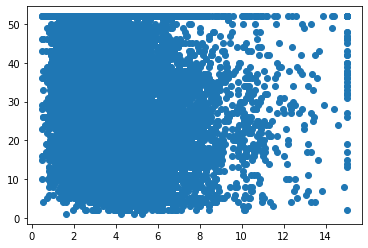

In [7]:
# comparação de 2 variáveis (0 e 1)
plt.scatter(X[:, 0], X[:, 1])

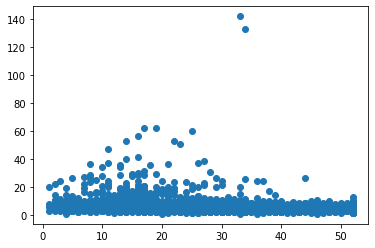

In [8]:
# comparação de 2 variáveis (1 e 2)
plt.scatter(X[:, 1], X[:, 2])

## Criando um modelo sem qualquer normalização de dados

In [9]:
# criação do pipeline somente com o classificador
pipe = Pipeline([
    ('model', KNeighborsRegressor())
])


In [10]:
# criação do GridSearch
mod = GridSearchCV(
    estimator=pipe,
    param_grid={'model__n_neighbors': [3, 4, 5, 7, 9, 10]},
    cv = 10
)

In [11]:
mod.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('model', KNeighborsRegressor())],
 'estimator__verbose': False,
 'estimator__model': KNeighborsRegressor(),
 'estimator__model__algorithm': 'auto',
 'estimator__model__leaf_size': 30,
 'estimator__model__metric': 'minkowski',
 'estimator__model__metric_params': None,
 'estimator__model__n_jobs': None,
 'estimator__model__n_neighbors': 5,
 'estimator__model__p': 2,
 'estimator__model__weights': 'uniform',
 'estimator': Pipeline(steps=[('model', KNeighborsRegressor())]),
 'n_jobs': None,
 'param_grid': {'model__n_neighbors': [3, 4, 5, 7, 9, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [12]:
# treino do modelo
mod.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [3, 4, 5, 7, 9, 10]})

In [13]:
# visualização do resultado do Gridsearch
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040898,0.001445,0.010104,0.000830,3,{'model__n_neighbors': 3},-0.098196,-0.085104,0.048438,0.014687,0.052493,-0.003277,-0.899167,-0.090386,-0.766223,-0.134335,-0.196107,0.325492,6
1,0.040001,0.000893,0.010600,0.000489,4,{'model__n_neighbors': 4},-0.006778,-0.065316,0.084546,0.059016,0.054946,0.026840,-0.801035,-0.076298,-0.762449,-0.098529,-0.158506,0.317168,5
2,0.040698,0.001101,0.010600,0.000664,5,{'model__n_neighbors': 5},0.038265,-0.062495,0.076177,0.104790,0.049476,0.037426,-0.743533,-0.052978,-0.735343,-0.083733,-0.137195,0.306784,4
3,0.040399,0.001625,0.011701,0.000639,7,{'model__n_neighbors': 7},0.077123,-0.063025,0.087127,0.175959,0.034507,0.062035,-0.746184,-0.025205,-0.691182,-0.053275,-0.114212,0.310010,3
4,0.039699,0.000458,0.012200,0.000401,9,{'model__n_neighbors': 9},0.103848,-0.076967,0.069544,0.181275,0.030953,0.066866,-0.689333,-0.003021,-0.691986,-0.034540,-0.104336,0.301032,1
5,0.041396,0.002327,0.013005,0.000892,10,{'model__n_neighbors': 10},0.096057,-0.077864,0.069562,0.181108,0.025241,0.074052,-0.698633,0.006163,-0.683655,-0.036370,-0.104434,0.301134,2


In [14]:
# predição usando os mesmos dados do treinamento (apenas para efeito de comparação)
pred = mod.predict(X)

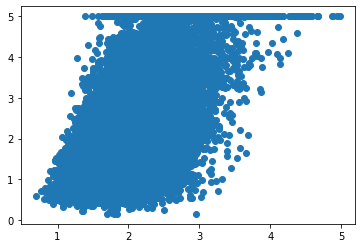

In [15]:
# comparando a predição com o valor real
# ATENÇÃO: Foi utilizado apenas para efeito de avaliação o mesmo conjunto de dados para treino e predição!!
plt.scatter(pred, y)

In [16]:
# apenas para visualizar os dados da predição
pred

array([2.46966778, 2.48155556, 3.24344667, ..., 1.18366667, 1.47644444,
       1.81244444])

In [17]:
error = sqrt(mean_squared_error(y,pred)) #calculate rmse
print("Erro médio quadrado {}".format(error))

Erro médio quadrado 0.9259031324220246


In [27]:
ErrorArray = []
ErrorArray.append(['Sem', error])

In [28]:
pd.DataFrame(pred, columns=['Predict']).head(5)

,Predict
0,2.469668
1,2.481556
2,3.243447
3,2.727780
4,2.891557


## Criando uma função para uso nos blocos seguintes

In [30]:
def execucao(pipe, X, y, errorArray, qual):
    # criação do GridSearch
    mod = GridSearchCV(
        estimator=pipe,
        param_grid={'model__n_neighbors': [3, 4, 5, 7, 9, 10]},
        cv = 10
    )

    # treino do modelo
    mod.fit(X, y)

    # predição usando os mesmos dados do treinamento (apenas para efeito de comparação)
    pred = mod.predict(X)
    
    # comparando a predição com o valor real
    plt.scatter(pred, y)
    
    # apenas para visualizar os dados da predição
    print('Valores previstos {}'.format(pred))
    
    # calcula o erro RMSE
    error = sqrt(mean_squared_error(y,pred)) #calculate rmse
    print("Erro médio quadrado {}".format(error))
    
    # visualizando os primeiros registros preditos
    print(pd.DataFrame(pred, columns=['Predict']).head(5))
    
    ErrorArray.append([qual, error])
    #print(ErrorArray)
    return ErrorArray

## A: Criando a mesma sequência com StandardScaler

Valores previstos [4.784107 4.326802 4.355605 ... 0.8098   0.8726   1.0126  ]
Erro médio quadrado 0.5667217027795453
    Predict
0  4.784107
1  4.326802
2  4.355605
3  3.964403
4  2.362700
[['Sem', 0.9259031324220246], ['StandardScaler', 0.5667217027795453]]


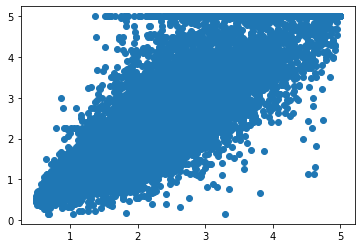

In [31]:
# criação do mesmo pipeline mas com a inclusão de uma fase de normalização: StandardScaler
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor())
])
ErrorArray = execucao(pipe, X, y, ErrorArray, 'StandardScaler')

## B: Criando a mesma sequência com MinMaxScaler

Valores previstos [4.251105 3.9643   3.873401 ... 0.7981   0.8137   1.0521  ]
Erro médio quadrado 0.5511093655398388
    Predict
0  4.251105
1  3.964300
2  3.873401
3  3.459000
4  2.228600
[['Sem', 0.9259031324220246], ['StandardScaler', 0.5667217027795453], ['MinMaxScaler', 0.5511093655398388]]


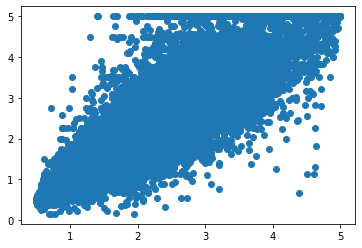

In [33]:
# criação do mesmo pipeline mas com a inclusão de uma fase de normalização: MinMaxScaler
pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', KNeighborsRegressor())
])
ErrorArray = execucao(pipe, X, y, ErrorArray, 'MinMaxScaler')

## C: Criando a mesma sequência com RobustScaler

Valores previstos [4.132703 4.311402 4.329104 ... 0.8107   0.899    0.9955  ]
Erro médio quadrado 0.5635762420188265
    Predict
0  4.132703
1  4.311402
2  4.329104
3  3.472400
4  2.824800
[['Sem', 0.9259031324220246], ['StandardScaler', 0.5667217027795453], ['MinMaxScaler', 0.5511093655398388], ['RobustScaler', 0.5635762420188265]]


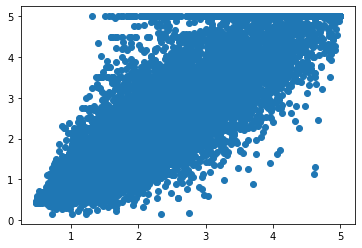

In [34]:
# criação do mesmo pipeline mas com a inclusão de uma fase de normalização: RobustScaler
pipe = Pipeline([
    ('scale', RobustScaler()),
    ('model', KNeighborsRegressor())
])
ErrorArray = execucao(pipe, X, y, ErrorArray, 'RobustScaler')

## D: Criando a mesma sequência com MaxAbsScaler

Valores previstos [4.311306 3.788    4.103503 ... 0.8023   0.9486   1.127   ]
Erro médio quadrado 0.6628928627358934
    Predict
0  4.311306
1  3.788000
2  4.103503
3  3.664501
4  2.542200
[['Sem', 0.9259031324220246], ['StandardScaler', 0.5667217027795453], ['MinMaxScaler', 0.5511093655398388], ['RobustScaler', 0.5635762420188265], ['MaxAbsScaler', 0.6628928627358934]]


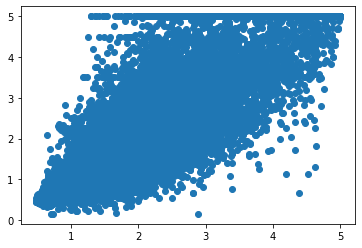

In [35]:
# criação do mesmo pipeline mas com a inclusão de uma fase de normalização: MaxAbsScaler
pipe = Pipeline([
    ('scale', MaxAbsScaler()),
    ('model', KNeighborsRegressor())
])
ErrorArray = execucao(pipe, X, y, ErrorArray, 'MaxAbsScaler')

## E: Criando a mesma sequência com PolynomialFeatures

Valores previstos [2.384501 1.8481   3.056602 ... 1.1878   1.4815   1.8978  ]
Erro médio quadrado 0.9802299200333445
    Predict
0  2.384501
1  1.848100
2  3.056602
3  2.207901
4  3.116601
[['Sem', 0.9259031324220246], ['StandardScaler', 0.5667217027795453], ['MinMaxScaler', 0.5511093655398388], ['RobustScaler', 0.5635762420188265], ['MaxAbsScaler', 0.6628928627358934], ['PolynomialFeatures', 0.9802299200333445]]


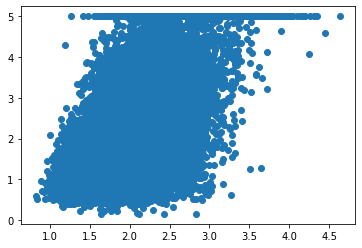

In [36]:
# criação do mesmo pipeline mas com a inclusão de uma fase de normalização: PolynomialFeatures
pipe = Pipeline([
    ('scale', PolynomialFeatures()),
    ('model', KNeighborsRegressor())
])
ErrorArray = execucao(pipe, X, y, ErrorArray, 'PolynomialFeatures')

# Resumo dos resultados

In [41]:
print(pd.DataFrame(ErrorArray, columns=['Opção', 'Erro RMSE']))
# menor erro melhor

                Opção  Erro RMSE
0                 Sem   0.925903
1      StandardScaler   0.566722
2        MinMaxScaler   0.551109
3        RobustScaler   0.563576
4        MaxAbsScaler   0.662893
5  PolynomialFeatures   0.980230


### Comparação dos 5 primeiros registros
Valores de y original (5 registros
0	4.526
1	3.585
2	3.521
3	3.413
4	3.422

Predict sem normalização
0	2.469668
1	2.481556
2	3.243447
3	2.727780
4	2.891557

Opção StandardScaler
0  4.784107
1  4.326802
2  4.355605
3  3.964403
4  2.362700

Opção MinMaxScaler
0  4.251105
1  3.964300
2  3.873401
3  3.459000
4  2.228600

Opção RobustScaler
0  4.132703
1  4.311402
2  4.329104
3  3.472400
4  2.824800

MaxAbsScaler
0  4.311306
1  3.788000
2  4.103503
3  3.664501
4  2.542200

PolynomialFeatures
0  2.384501
1  1.848100
2  3.056602
3  2.207901
4  3.116601